## Squidpy tutorial: Analyze Slide-seqV2 data

https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_slideseqv2.html


Various errors I ran into while setting up environment and running code.

Initial errors with first env:
- Created new env with python 3.9

Manually installing libs:
- conda install numpy # pip install --force-reinstall numpy==1.26.4
- conda install -c conda-forge spatialdata spatialdata-io spatialdata-plot napari-spatialdata

Missing 'liblapack':
- brew install lapack
- conda install lapack
- conda install scipy

Adding installation for running LIANA+:
- pip install liana
- conda install conda-forge::mudata
- pip install "decoupler>=1.4.0" # N.B! This package requires numpy≥2


In [ ]:
%matplotlib inline

In [2]:
import squidpy as sq

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [3]:
print(f"squidpy=={sq.__version__}")

squidpy==1.6.1


In [4]:
import numpy as np

In [5]:
print(f"numpy=={np.__version__}")

numpy==1.26.4


**Import data & perform tutorial analyses**

In [6]:
adata = sq.datasets.slideseqv2()
adata

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


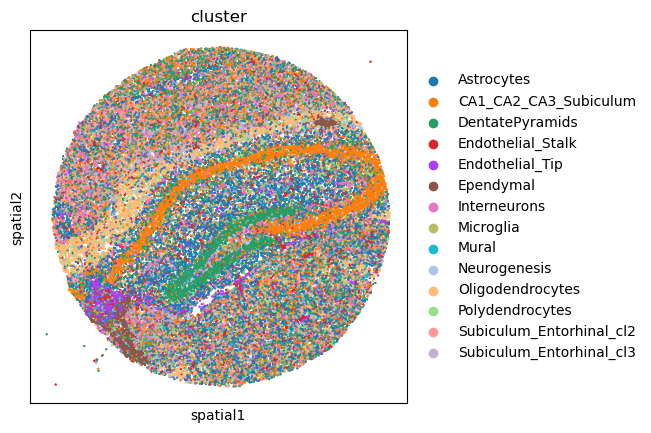

In [7]:
sq.pl.spatial_scatter(adata, color="cluster", size=1, shape=None)

**Neighborhood enrichment**

In [8]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")

  0%|          | 0/1000 [00:00<?, ?/s]

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


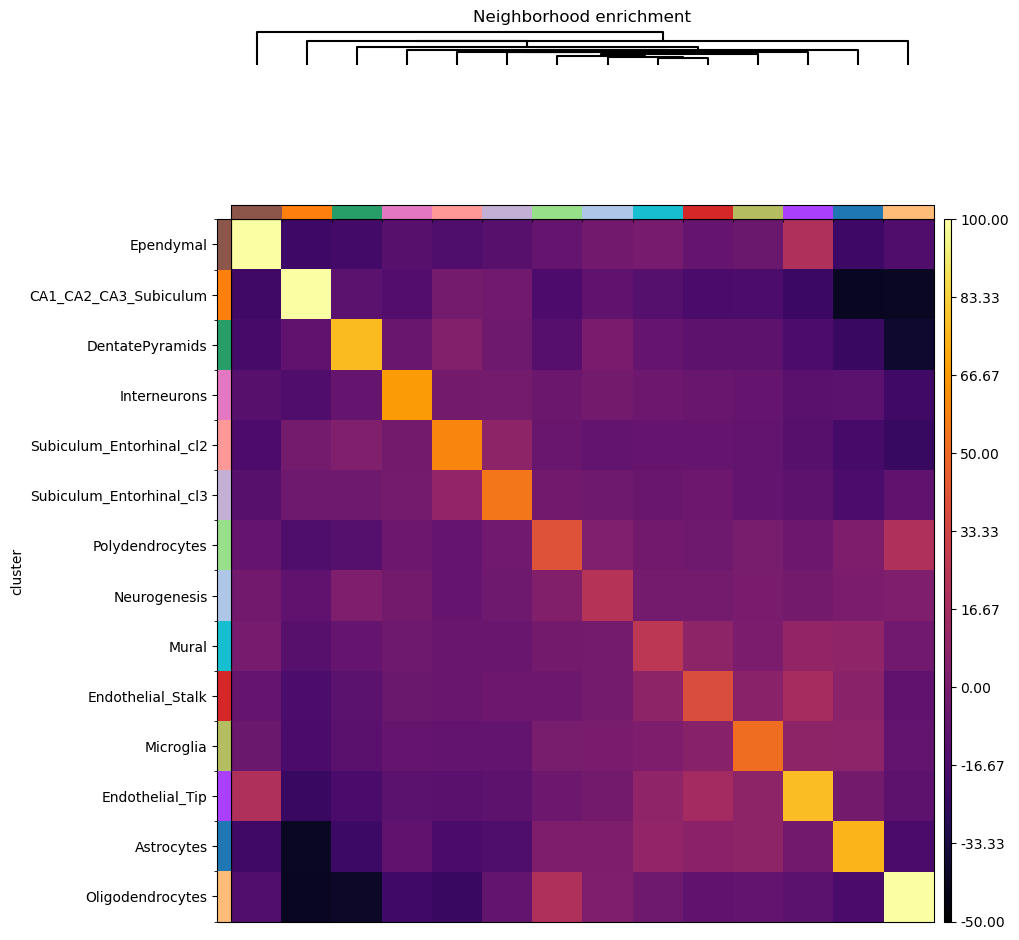

In [9]:
sq.pl.nhood_enrichment(
    adata, cluster_key="cluster", method="single", cmap="inferno", vmin=-50, vmax=100
)

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


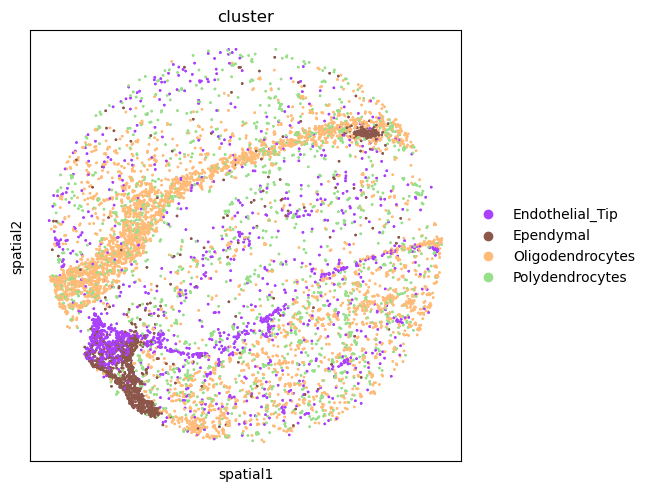

In [10]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cluster",
    groups=["Endothelial_Tip", "Ependymal", "Oligodendrocytes", "Polydendrocytes"],
    size=3,
)

**Ripley statistics**

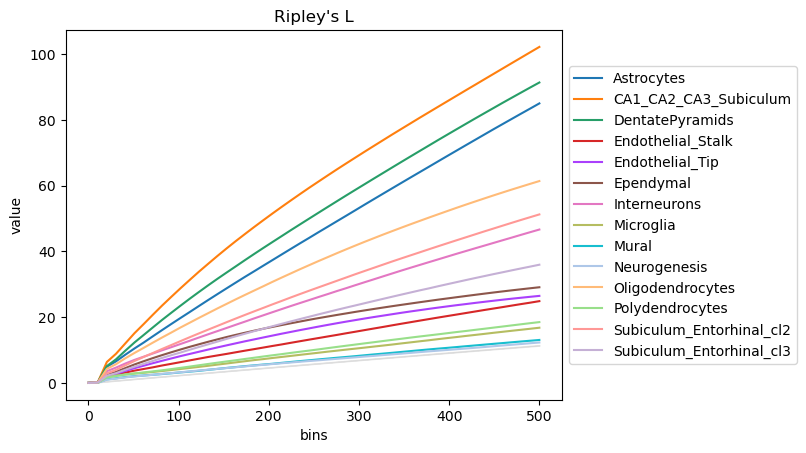

In [11]:
mode = "L"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode, max_dist=500)
sq.pl.ripley(adata, cluster_key="cluster", mode=mode)

/opt/homebrew/anaconda3/envs/squidpy/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


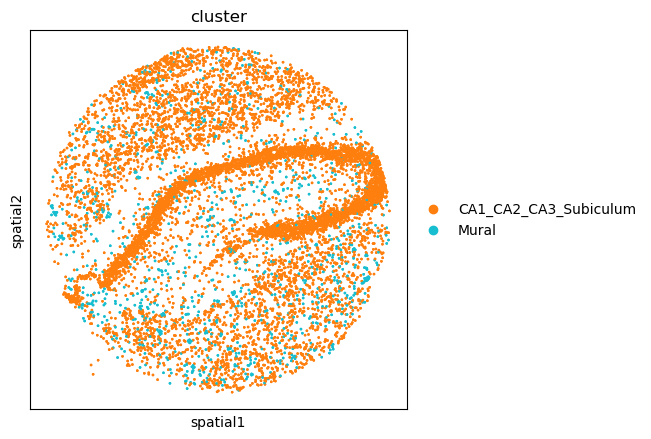

In [12]:
sq.pl.spatial_scatter(
    adata,
    color="cluster",
    groups=["Mural", "CA1_CA2_CA3_Subiculum"],
    size=3,
    shape=None,
)

**Spatially variable genes with spatial autocorrelation statistics**

In [13]:
sq.gr.spatial_autocorr(adata, mode="moran")
adata.uns["moranI"].head(10)

,I,pval_norm,var_norm,pval_norm_fdr_bh
Ttr,0.705846,0.0,0.000007,0.0
Plp1,0.531659,0.0,0.000007,0.0
Hpca,0.493652,0.0,0.000007,0.0
Mbp,0.488613,0.0,0.000007,0.0
Enpp2,0.458899,0.0,0.000007,0.0
1500015O10Rik,0.458650,0.0,0.000007,0.0
Pcp4,0.429474,0.0,0.000007,0.0
Sst,0.406900,0.0,0.000007,0.0
Ptgds,0.387598,0.0,0.000007,0.0
Nrgn,0.370682,0.0,0.000007,0.0


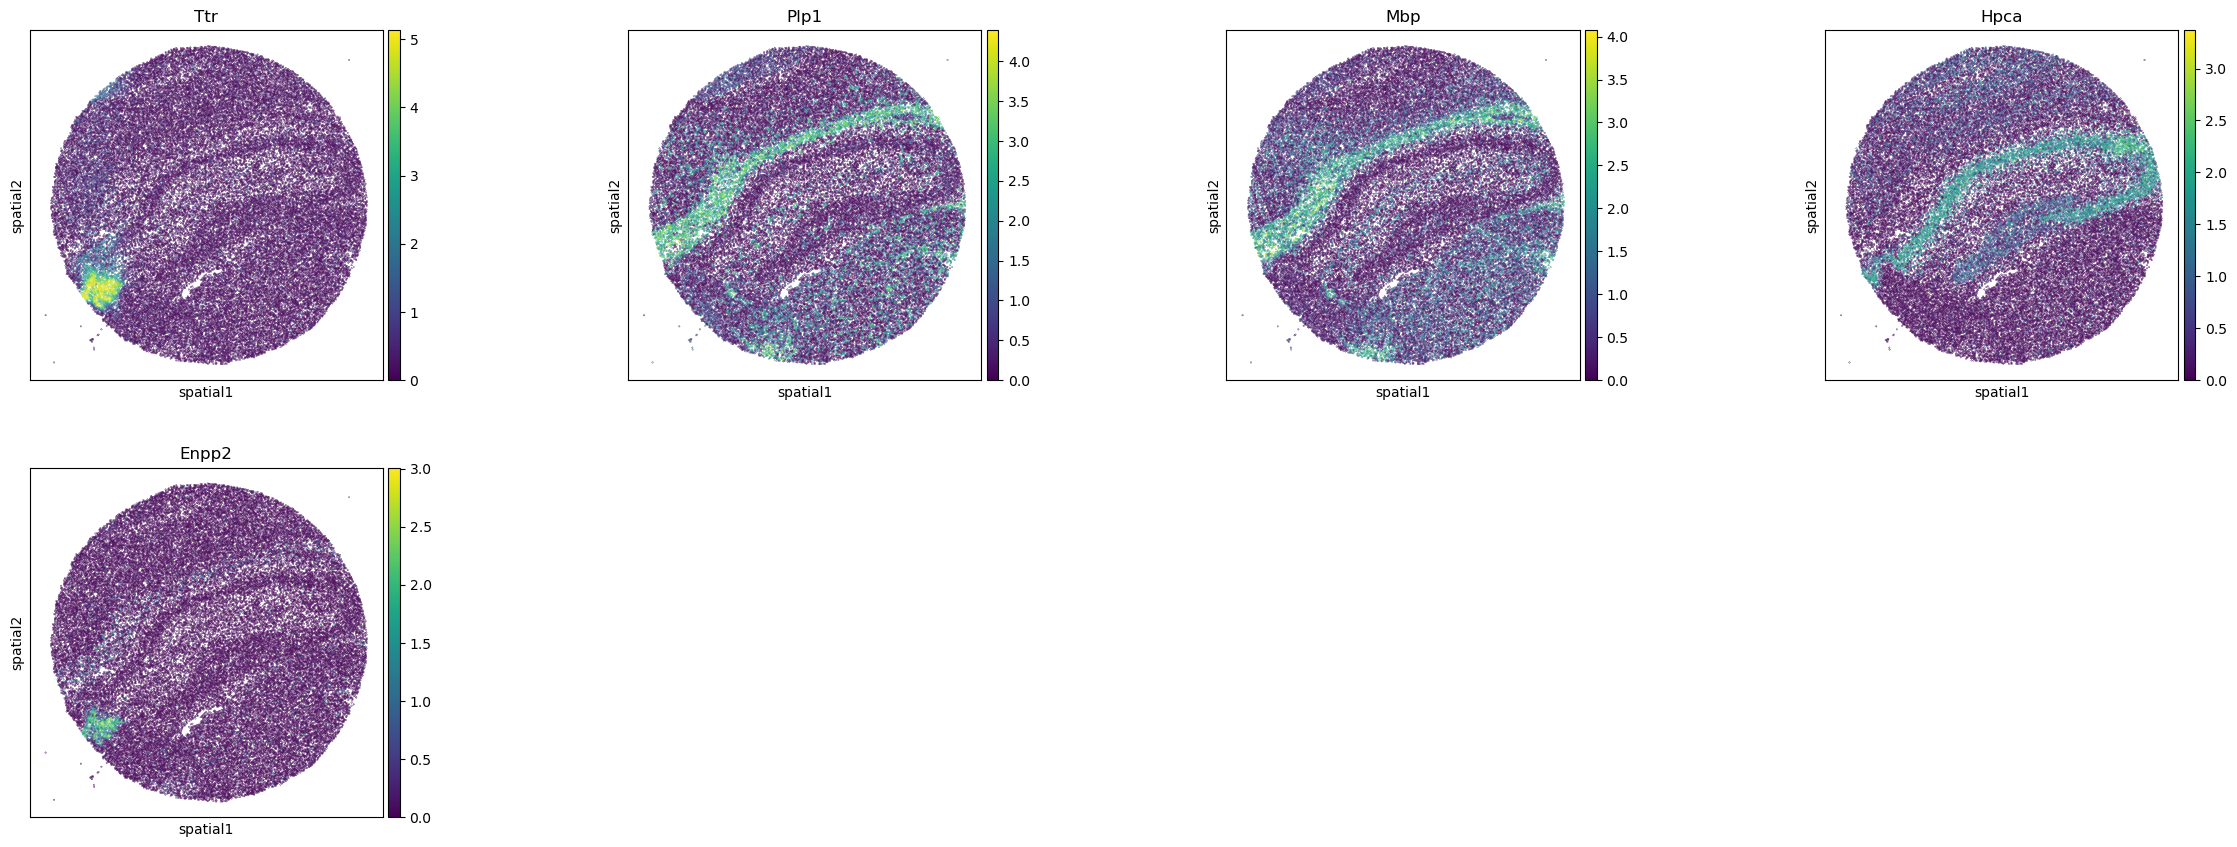

In [14]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color=["Ttr", "Plp1", "Mbp", "Hpca", "Enpp2"],
    size=0.1,
)

**Ligand-receptor interaction analysis** --- not working right now (let's skip)

sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="cluster",
    clusters=["Polydendrocytes", "Oligodendrocytes"],
)

sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Oligodendrocytes",
    target_groups=["Polydendrocytes"],
    pvalue_threshold=0.05,
    swap_axes=True,
)